In [1]:
#  All of my inputs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.utils import resample

In [2]:
train = pd.read_csv('./assets/clean_train.csv')
#sample = pd.read_csv('./assets/sampleSubmission.csv')

In [3]:
train = train.drop(["Unnamed: 0", "Species0", "Species_CULEX RESTUANS"], axis=1)

In [4]:
train.head()

,NumMosquitos,WnvPresent,Week_22,Week_23,Week_24,Week_25,Week_26,Week_27,Week_28,Week_29,...,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Year_2007,Year_2009,Year_2011,Year_2013
0,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,4,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [32]:
train.columns.values

array(['NumMosquitos', 'WnvPresent', 'Week_22', 'Week_23', 'Week_24',
       'Week_25', 'Week_26', 'Week_27', 'Week_28', 'Week_29', 'Week_30',
       'Week_31', 'Week_32', 'Week_33', 'Week_34', 'Week_35', 'Week_36',
       'Week_37', 'Week_38', 'Week_39', 'Week_40', 'Week_41', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Year_2007', 'Year_2009', 'Year_2011', 'Year_2013'], dtype=object)

In [5]:
print('Baseline accuracy is', train['WnvPresent'].value_counts(normalize=True).sort_values().values[-1]*100)

Baseline accuracy is 94.75537787930706


In [6]:
y = train['WnvPresent']
X = train.drop(['WnvPresent'], axis = 1)

In [7]:
#y = y.iloc[2:]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Random Forest Classifer

In [9]:
params = {
    'n_estimators' : [1, 3, 5, 7, 9, 11],
    'min_samples_leaf' : [1, 3, 5, 7, 9],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'log2'],
    'bootstrap': [True, False]
    
}

In [10]:
GridSearchCV(
    RandomForestClassifier(),
    params
)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 3, 5, 7, 9, 11], 'min_samples_leaf': [1, 3, 5, 7, 9], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'log2'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [11]:
%%time

random_forest = GridSearchCV(
    RandomForestClassifier(),
    params
).fit(X_train, y_train)

Wall time: 33.9 s


In [12]:
random_forest.score(X_test, y_test)

0.9467072706509326

In [13]:
random_forest.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 9,
 'n_estimators': 9}

In [14]:
random_forest.best_score_

0.9475821804797563

In [15]:
random_forest.predict_proba(X_test)

array([[0.9957115 , 0.0042885 ],
       [0.99803343, 0.00196657],
       [1.        , 0.        ],
       ...,
       [0.86221722, 0.13778278],
       [0.66056306, 0.33943694],
       [1.        , 0.        ]])

In [16]:
confusion_matrix(y_test, random_forest.predict(X_test))

array([[2483,    6],
       [ 134,    4]], dtype=int64)

In [17]:
fpr, tpr, _ = roc_curve(y_test, random_forest.predict(X_test))

#calculate AUC
roc_auc = auc(fpr, tpr)

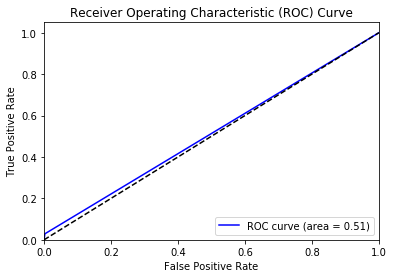

In [18]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, color = 'blue')
plt.plot([0, 1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [19]:
# rf_predictions = random_forest.predict_proba(X)[:,1]
#sample['WnvPresent'] = rf_predictions
#sample.to_csv('random_first.csv', index=False)

# Logisitic Regression

In [20]:
lr =GridSearchCV(
    LogisticRegression(),
    {
        'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 10, 100, 1000]

    }
)

In [21]:
%%time

lr.fit(X_train, y_train)

Wall time: 2.89 s


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2', 'l1'], 'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
lr.best_score_

0.9475821804797563

In [23]:
lr.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [24]:
lr.score(X_test, y_test)

0.9474685953559193

In [25]:
confusion_matrix(y_test, lr.predict(X_test))

array([[2489,    0],
       [ 138,    0]], dtype=int64)

In [26]:
fpr, tpr, _ = roc_curve(y_test, lr.predict(X_test))

roc_auc = auc(fpr, tpr)

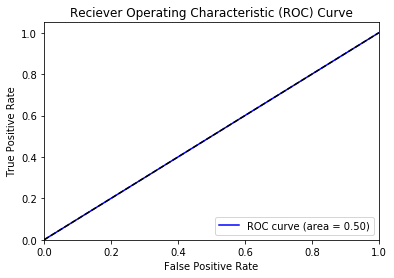

In [27]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, color = 'blue')
plt.plot([0, 1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Trying to figure out how to make a submission to Kaggle but getting errors

In [28]:
lr_predictions = lr.predict_proba(X)[:,1]
#sample['WnvPresent'] = lr_predictions
#sample.to_csv('lr_first.csv', index=False)

### At the moment, these are my results:

-  Baseline Accurracy is 94.8%
-  Random Forest is 94.8%
-  Logisitic Regression is 94.8%

### Standardizing data didn't yield any differences

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
%%time

random_forestss = GridSearchCV(
    RandomForestClassifier(),
    params
).fit(X_train, y_train)

In [ ]:
random_forestss.score(X_test, y_test)

In [ ]:
random_forestss.best_params_

In [ ]:
random_forestss.best_score_

# Neural Network

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [30]:
X_train.shape  # 31 features

(7879, 31)

In [31]:
%%time
ss = StandardScaler()

def model_funk(layer_one_neurons = 31, layer_two_neurons = 15):  # can make neurons dynamic
    model = Sequential()
    
    model.add(Dense(layer_one_neurons, input_dim=31, activation = 'relu')) # 30 neurons
    model.add(Dense(layer_two_neurons, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))  # 1 hidden layer
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

the_model = KerasClassifier(build_fn=model_funk, epochs = 10, verbose = 0)   #function that creates a model and returns it

pipe = Pipeline([
    ('ss', ss),
    ('model', the_model)
])

params = {
    'model__epochs' : [10],
    'model__layer_one_neurons' : [15, 35],
    'model__layer_two_neurons' : [15, 20]
}
gs = GridSearchCV(pipe, param_grid = params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.9475821804797563


{'model__epochs': 10,
 'model__layer_one_neurons': 15,
 'model__layer_two_neurons': 15}